In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [3]:
df=pd.read_csv(r"C:\Users\PC\Desktop\kc_house_data.csv")

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
df.shape

(21613, 21)

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
col_names=["id","date","price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"]
for col in col_names:
    print(f"{col}: {df[col].nunique()} unique values")                
       

id: 21436 unique values
date: 372 unique values
price: 4028 unique values
bedrooms: 13 unique values
bathrooms: 30 unique values
sqft_living: 1038 unique values
sqft_lot: 9782 unique values
floors: 6 unique values
waterfront: 2 unique values
view: 5 unique values
condition: 5 unique values
grade: 12 unique values
sqft_above: 946 unique values
sqft_basement: 306 unique values
yr_built: 116 unique values
yr_renovated: 70 unique values
zipcode: 70 unique values
lat: 5034 unique values
long: 752 unique values
sqft_living15: 777 unique values
sqft_lot15: 8689 unique values


In [11]:
 selection_feature=df.drop(["id","date","sqft_above","sqft_basement","lat","long","sqft_living15","sqft_lot15"],axis=1)
 print(selection_feature.head())

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  yr_built  yr_renovated  zipcode  
0     0          3      7      1955             0    98178  
1     0          3      7      1951          1991    98125  
2     0          3      6      1933             0    98028  
3     0          5      7      1965             0    98136  
4     0          3      8      1987             0    98074  


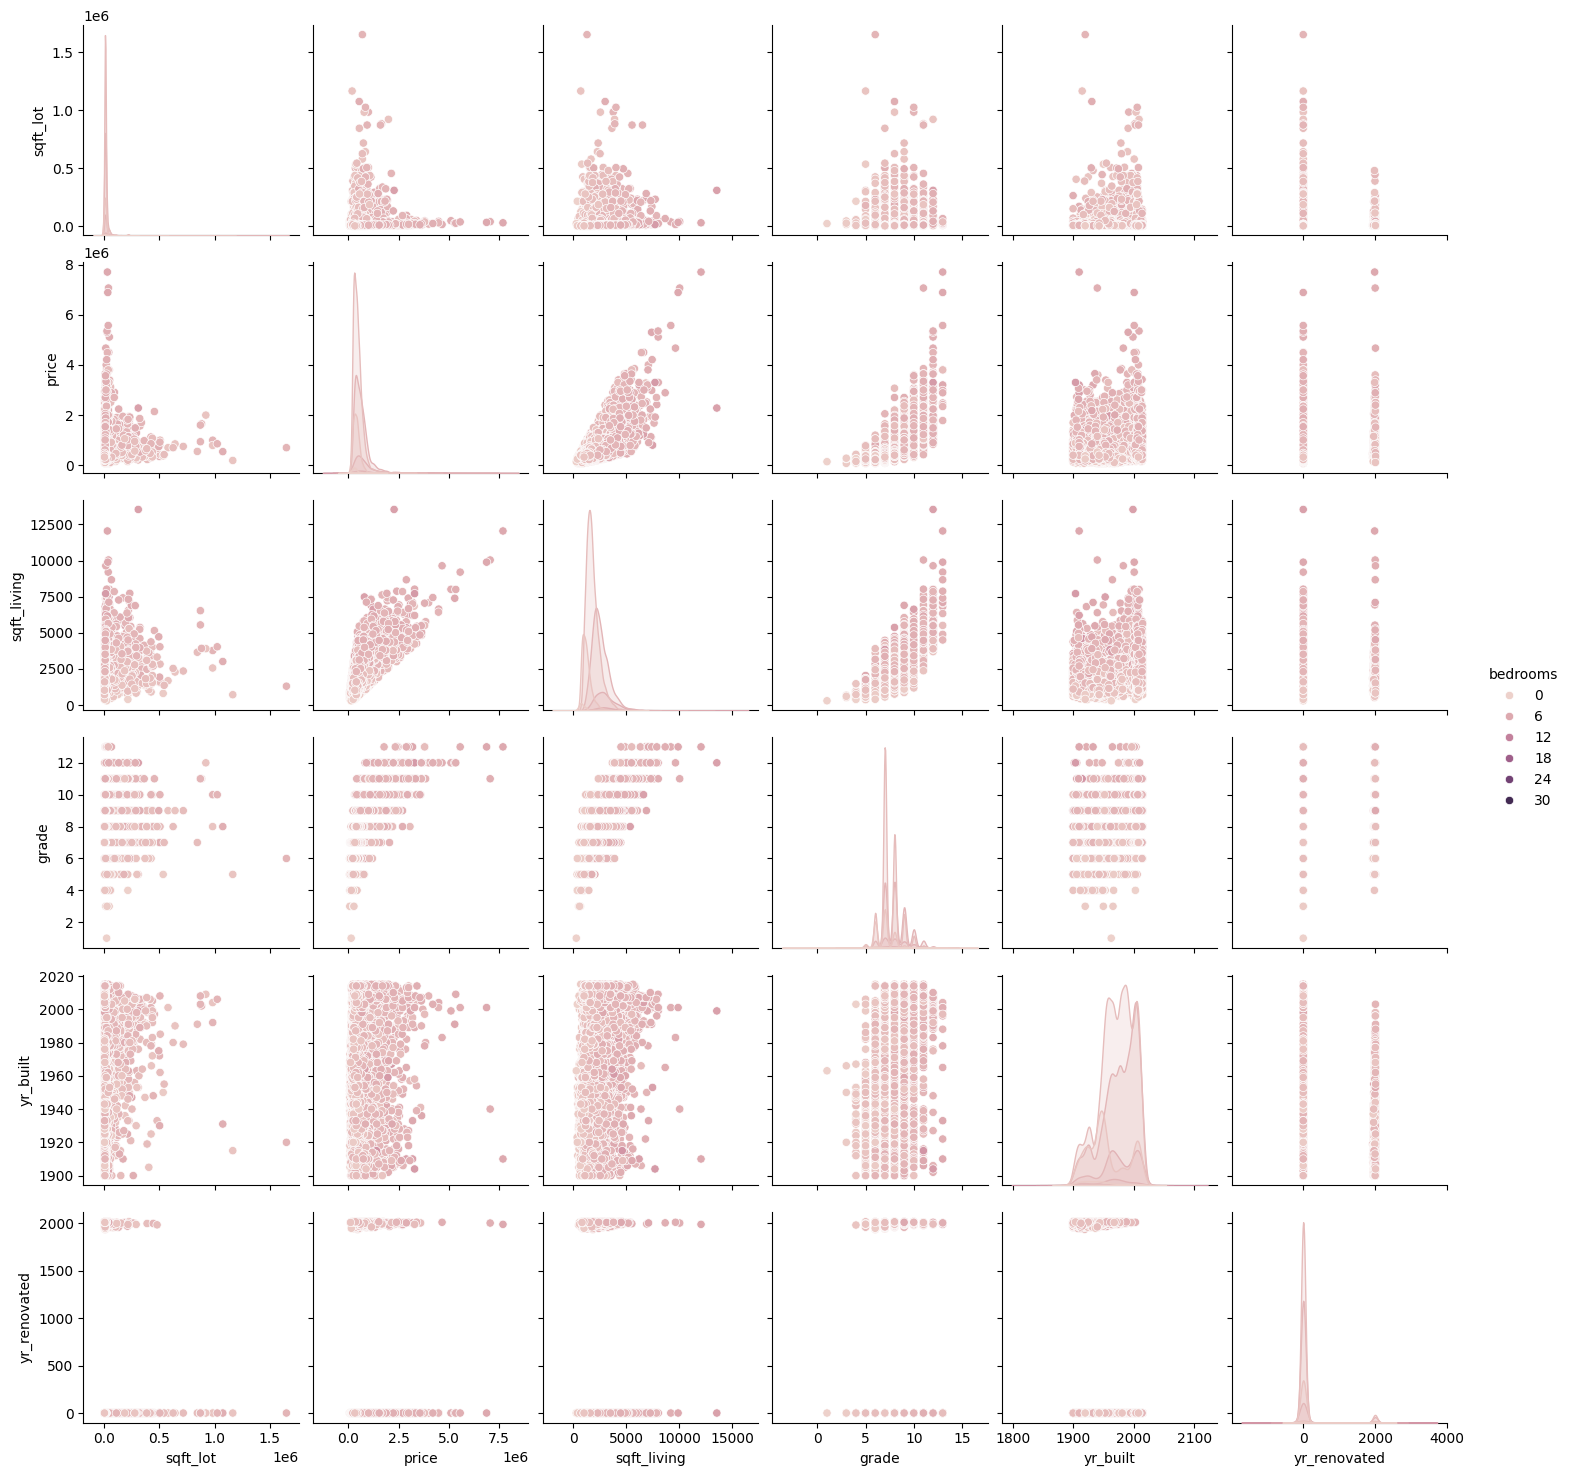

In [12]:
sns.pairplot(selection_feature[['sqft_lot','price','sqft_living','bedrooms','grade','yr_built','yr_renovated']],hue='bedrooms')

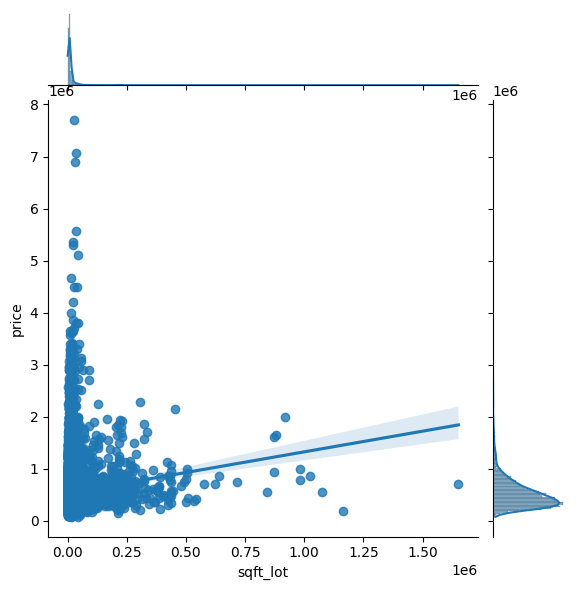

In [13]:
sns.jointplot(x="sqft_lot",y="price",data=selection_feature,kind="reg")

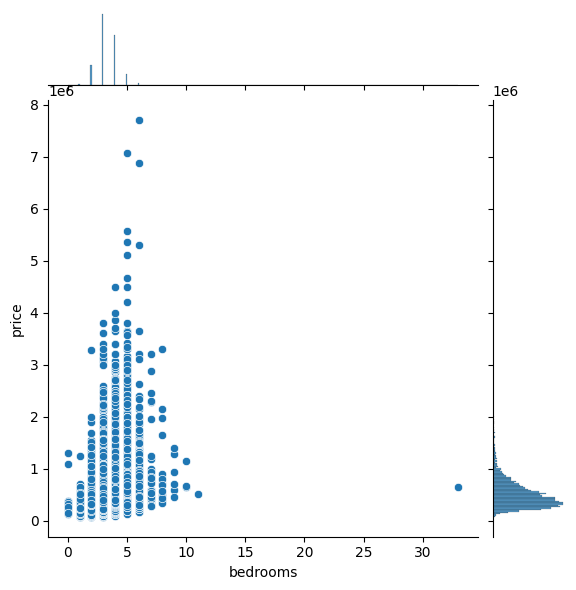

In [14]:
sns.jointplot(x="bedrooms",y="price",data=selection_feature,kind="scatter")

<Axes: >

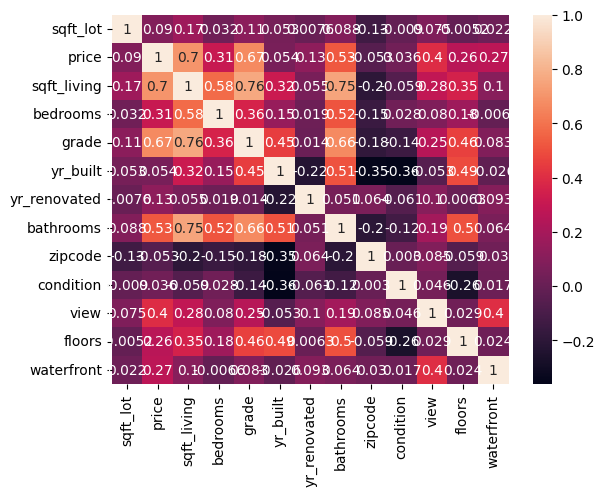

In [15]:
heat_feature=selection_feature[['sqft_lot','price','sqft_living','bedrooms','grade','yr_built','yr_renovated','bathrooms','zipcode','condition','view','floors','waterfront']]
sns.heatmap(heat_feature.corr(),annot=True)

In [16]:
X=selection_feature.iloc[ :,1 : ].values
Y=selection_feature.iloc[ :,0 : ].values

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)


In [18]:
model=LinearRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)

In [19]:

print("explained variance score of linear regression model is :",explained_variance_score(predictions,y_test))

explained variance score of linear regression model is : 0.9573313053309804


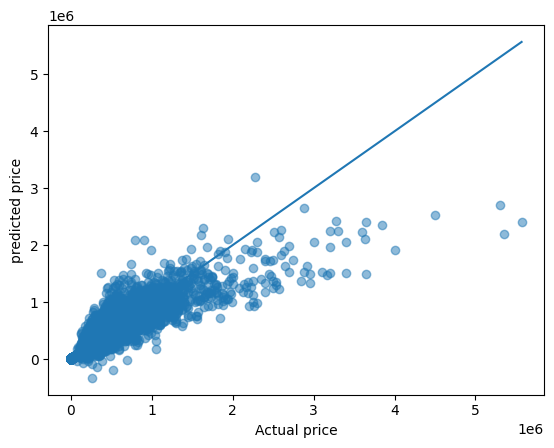

In [20]:
plt.scatter(y_test,predictions,alpha=0.5)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()])
plt.show()

In [21]:
model2=DecisionTreeRegressor(random_state=0)
model2.fit(x_train,y_train)
predictions2=model2.predict(x_test)

In [23]:
print("explained variance score of decision tree regressor is :",explained_variance_score(predictions,y_test))

explained variance score of decision tree regressor is : 0.9573313053309804


In [22]:
model3=RandomForestRegressor(random_state=0)
model3.fit(x_train,y_train)
predictions3=model3.predict(x_test)

In [77]:
print("explained variance score of rendom forest regressor is :",explained_variance_score(predictions,y_test))


explained variance score of rendom forest regressor is : 0.9573313053309804


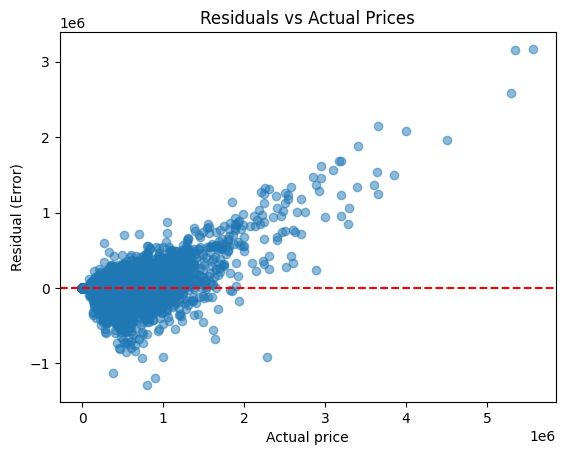

In [24]:
residuals = y_test - predictions
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual price")
plt.ylabel("Residual (Error)")
plt.title("Residuals vs Actual Prices")
plt.show()


In [26]:
unseen_score=model.score(x_test,y_test)
print("the R square using the linear regression:",unseen_score)

the R square using the linear regression: 0.9731315001993276
